# <p style="text-align: center;"> Part Five: Encoding </p>
![title](https://media.giphy.com/media/H4DjXQXamtTiIuCcRU/giphy.gif)

In [1]:
from IPython.core.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# <p style="text-align: center;"> Table of Contents </p>

- ## 1. [Introduction](#Introduction)
   - ### 1.1 [Abstract](#abstract)
- ## 2 [Encoding](#en)
   - ### 2.1 [What are Encodings?](#enc)
   - ### 2.2 [Reading in files with encoding problems¶](#re)
   - ### 2.3 [Saving your files with UTF-8 encoding¶](#sd))
   - ### 2.5. [Encoding Techniques- Categorical Data](#m2)
      - ####  2.4.1 [Label Encoding](#le)
      - ####  2.4.2 [One Hot Encoding](#ohe)
      - ####  2.4.3 [Feature Hashing](#fh)
      - ####  2.4.4 [Encoding categories with dataset statistics](#ee)
      - ####  2.4.5 [Encoding cyclic features ¶](#s)
      - ####  2.4.6 [Target Encoding](#tr)
      - ####  2.4.7 [K-Fold target encoding](#k)
- ## 3. [Conclusion](#Conclusion)
- ## 4. [Contribution](#Contribution)
- ## 5. [Citation](#Citation)
- ## 6. [License](#License)

# <p style="text-align: center;"> Introduction </p> <a id='Introduction'> </a>

## 1.1 Abstract <a id="abstract">  </a>

Through this kernel,We are going to learn and try some of the most commonly used encoding techniques. As this competition mainly deals with encoding I hope that it would be a great time to refresh some the most common and effective encoding techniques currently in use.

##  1.2 Importing Libraries 

In [2]:
import pandas as pd
import numpy as np

# <p style="text-align: center;"> 2.0 Encoding </p> <a id='en'> </a>

## 2.1 What are encodings? <a id="enc"> </a>


### Character Set
Before discussing encodings, we need to introduce a related concept called a character set, which is the set of objects to be encoded. Take plain English, for example. We probably want to encode the letters A–Z (in both upper and lower cases); we then need the numbers 0–9; and probably, we also need the symbols such as “,” and “.”. All these objects together constitute a character set. 

The standard character set for plain English is the so-called ASCII set. It contains all the objects we just mentioned as well as some other special symbols (dollar and pound signs, some mathematical operators, etc.). Each object in a character set has a unique ID called its code point.

However, English is not the only language in the world, and almost any language would need some additional or alternative symbols or objects: Arabic, Chinese, French, German, Hindi, Japanese, Russian, Swedish, etc. For a while, almost every language had its own character set, and the world was accumulating a wealth of character sets and corresponding encodings. In addition to their sheernumber and variety, another problem of having so many distinct character sets and encodings is how very inconvenient such multiplicity made working with text files containing multiple languages. Eventually, Unicode was developed to redress this situation. Unicode has virtually all the characters and symbols in all the languages on earth; it is currently the largest character set in use. 

### Encoding

Now we turn to encodings. ASCII is also an encoding scheme itself. That is to say, each character in ASCII is mapped to a binary sequence directly by converting its code point (i.e., its numeric ID) to a binary number. For example, the code point for the letter “A” is 65, and it is encoded as 65 in binary—01000001. For Unicode, the scheme had to become more complicated, creating some confusion for many people about encodings. First, Unicode, despite the word code in its root, is not actually an encoding scheme; it is a character set. Then, there are not one but three standard encoding schemes to map a code point in the Unicode set to a binary sequence in the computer. They are UTF-32, UTF-16, and UTF-8, with UTF-8 being the most popular encoding. For example, most webpages on the Internet are encoded by UTF-8. For most users of text analysis, it is not necessary to know the details of the mappings. Nonetheless, we discuss them briefly in the following paragraph for the curious.

It might seem straightforward to map a code point in Unicode to a binary sequence directly by converting the code point into binary, just as we do for ASCII. The huge size of Unicode complicates this however. Given how many objects it contains (consider all the Asiatic and Arabic and Cyrillic symbols in addition to the Roman
ones in ASCII), the largest code point in Unicode would take 32 bits—32 zeros or ones—in binary. We can certainly encode every code point as a 32-bit binary sequence and that is exactly what UTF-32 does, but a lot of space is wasted. 

Recall that the code point for “A” is 65, which is 01000001 in ASCII encoding. The code point for “A” is also 65 in Unicode, but if we encode it as a 32-bit binary sequence, then it will be 00000000000000000000000001000001. Although this encoding scheme is simple, it is not economical, as most of the spaces are wasted by padding 0s to get to 32 digits. The variable-length encodings such as UTF-8 and UTF-16 were developed to address this issue. If a code point can be encoded with a single byte (8 bits), then UTF-8 will encode it with a single byte (e.g., the letter “A”); if a single byte is not enough for some code point, UTF-8 will use two bytes (16 bits); if two is not enough, UTF-8 will try three, and so on. 

UTF-16 is between UTF-8 and UTF-32: it uses two bytes at least and four bytes when necessary. For the variable-length encodings, several bits are used to signal whether the currently encoded object is single-byte or multi-byte, and if multi-byte,the number of bytes in use. 

### Detecting Encodings
Since there are multiple encodings, a common question comes up when opening a text file: Which encoding is used by this file? (Technically, the process of opening a text file and displaying it on the screen is decoding, but if we know the encoding, then we know how to decode, so we will use the two interchangeably in this
guide.) This is an important question because if you open the text file with a wrong encoding scheme, then you might see weird symbols or might fail to open the file altogether. But unfortunately, there is no systematic way to tell what encoding the file uses by merely looking at its filename or content (a pile of 0s and 1s,
remember?). If there are no metadata about the encoding for the file, then the best one can do is trial and error. For example, start with ASCII, and if the text does not display correctly, try UTF-8, and so on.

In [3]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

#### The other data is the bytes data type, which is a sequence of integers. You can convert a string into bytes by specifying which encoding it's in:

In [4]:
# encode it to a different encoding, replacing characters that raise errors
after = before.encode("utf-8", errors = "replace")

# check the type
type(after)

bytes

#### If you look at a bytes object, you'll see that it has a b in front of it, and then maybe some text after. That's because bytes are printed out as if they were characters encoded in ASCII. (ASCII is an older character encoding that doesn't really work for writing any language other than English.) Here you can see that our euro symbol has been replaced with some mojibake that looks like "\xe2\x82\xac" when it's printed as if it were an ASCII string.

In [5]:
# take a look at what the bytes look like
after

b'This is the euro symbol: \xe2\x82\xac'

#### When we convert our bytes back to a string with the correct encoding, we can see that our text is all there correctly, which is great! :)

In [6]:
# convert it back to utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


However, when we try to use a different encoding to map our bytes into a string,, we get an error. This is because the encoding we're trying to use doesn't know what to do with the bytes we're trying to pass it. You need to tell Python the encoding that the byte string is actually supposed to be in.

You can think of different encodings as different ways of recording music. You can record the same music on a CD, cassette tape or 8-track. While the music may sound more-or-less the same, you need to use the right equipment to play the music from each recording format. The correct decoder is like a cassette player or a cd player. If you try to play a cassette in a CD player, it just won't work.

In [7]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 25: ordinal not in range(128)

We can also run into trouble if we try to use the wrong encoding to map from a string to bytes. Like I said earlier, strings are UTF-8 by default in Python 3, so if we try to treat them like they were in another encoding we'll create problems.

For example, if we try to convert a string to bytes for ascii using encode(), we can ask for the bytes to be what they would be if the text was in ASCII. Since our text isn't in ASCII, though, there will be some characters it can't handle. We can automatically replace the characters that ASCII can't handle. If we do that, however, any characters not in ASCII will just be replaced with the unknown character. Then, when we convert the bytes back to a string, the character will be replaced with the unknown character. The dangerous part about this is that there's not way to tell which character it should have been. That means we may have just made our data unusable!

In [8]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(


This is the euro symbol: ?


This is bad and we want to avoid doing it! It's far better to convert all our text to UTF-8 as soon as we can and keep it in that encoding. The best time to convert non UTF-8 input into UTF-8 is when you read in files, which we'll talk about next.

First, however, try converting between bytes and strings with different encodings and see what happens. Notice what this does to your text. Would you want this to happen to data you were trying to analyze?

## 2.2 Reading in files with encoding problems <a id ="re"> </a>

Most files you'll encounter will probably be encoded with UTF-8. This is what Python expects by default, so most of the time you won't run into problems. However, sometimes you'll get an error like this:

In [9]:
# try to read in a file not in UTF-8
kickstarter_2016 = pd.read_csv("Datasets\ks-projects-201612.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 11: invalid start byte

Notice that we get the same UnicodeDecodeError we got when we tried to decode UTF-8 bytes as if they were ASCII! This tells us that this file isn't actually UTF-8. We don't know what encoding it actually is though. One way to figure it out is to try and test a bunch of different character encodings and see if any of them work. A better way, though, is to use the chardet module to try and automatically guess what the right encoding is. It's not 100% guaranteed to be right, but it's usually faster than just trying to guess.

I'm going to just look at the first ten thousand bytes of this file. This is usually enough for a good guess about what the encoding is and is much faster than trying to look at the whole file. (Especially with a large file this can be very slow.) Another reason to just look at the first part of the file is that we can see by looking at the error message that the first problem is the 11th character. So we probably only need to look at the first little bit of the file to figure out what's going on.

In [10]:
# helpful character encoding module
import chardet
# look at the first ten thousand bytes to guess the character encoding
with open("Datasets\ks-projects-201612.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}


So chardet is 75.25% confidence that the right encoding is "UTF-8". Let's see if that's correct:

In [11]:
# read in the file with the encoding detected by chardet
kickstarter_2016 = pd.read_csv("Datasets\ks-projects-201612.csv", encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()

C:\Users\Rushabh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


Yep, looks like chardet was right! The file reads in with no problem (although we do get a warning about datatypes) and when we look at the first few rows it seems to be be fine.

>What if the encoding chardet guesses isn't right? Since chardet is basically just a fancy guesser, sometimes it will guess the wrong encoding. One thing you can try is looking at more or less of the file and seeing if you get a different result and then try that.

In [12]:
# what the correct encoding should be and read in the file. :)
police_killings = pd.read_csv("Datasets\PoliceKillingsUS.csv")


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 2: invalid start byte

## 2.3 Saving your files with UTF-8 encoding <a id="sd"> </a> 

Finally, once you've gone through all the trouble of getting your file into UTF-8, you'll probably want to keep it that way. The easiest way to do that is to save your files with UTF-8 encoding. The good news is, since UTF-8 is the standard encoding in Python, when you save a file it will be saved as UTF-8 by default:

In [13]:
# save our file (will be saved as UTF-8 by default!)
kickstarter_2016.to_csv("Datasets\ks-projects-201801-utf8.csv")


Pretty easy, huh? :)

>If you haven't saved a file in a kernel before, you need to hit the commit & run button and wait for your >notebook to finish running first before you can see or access the file you've saved out. If you don't see it at >first, wait a couple minutes and it should show up. The files you save will be in the directory "../output/", ?>and you can download them from your notebook.

## 2.4 Encoding Techniques - Categorical Data <a id="#m2"> </a> 

##  2.4.1 Method 1: Label encoding <a id='le'> </a>

This transformer should be used to encode target values, i.e. y, and not the input X.
In this method we change every categorical data to a number.That is each type will be subtuted by a number.for example we will substitute 1 for Grandmaster,2 for master ,3 for expert etc.. For implementing this we will first import Labelencoder from sklearn module.

![](https://miro.medium.com/max/2288/1*CK0gfoqvSPBziJcY1TQC6w.png)

In [14]:
from sklearn.preprocessing import LabelEncoder
df_train=pd.read_csv('Datasets/train_cat.csv')
#df_test=pd.read_csv('test_cat.csv')
X=df_train.drop(['target'],axis=1)
y=df_train['target']


Now we will do these three steps to label encode our data:

- Initialize the labelencoder class
- Call the fit() method to fit the data
- Transform data to labelencoded data

In [15]:
train=pd.DataFrame()
label=LabelEncoder()
for c in  X.columns:
    if(X[c].dtype=='object'):
        train[c]=label.fit_transform(X[c])
    else:
        train[c]=X[c]
        
train.head(3)    


,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,1,1,1,5,5,3,...,1686,2175,2,2,1,7,3,136,2,2
1,1,0,1,0,1,1,1,4,3,5,...,650,11635,1,2,3,0,0,93,7,8
2,2,0,0,0,0,1,0,4,4,5,...,1932,8078,1,1,4,7,17,31,7,2


Here you can see the label encoded output train data.We will check the shape of train data now and verify that there is no change in the number of columns.

In [16]:
print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 300000 rows and 24 columns


##  2.4.2 Method 2 : One hot encoding <a id='ohe'> </a>

Our second method is encoding each category as a one hot encoding (OHE) vector (or dummy variables). OHE is a representation method that takes each category value and turns it into a binary vector of size |i|(number of values in category i) where all columns are equal to zero besides the category column. Here is a little example:

![title](https://miro.medium.com/max/878/1*WXpoiS7HXRC-uwJPYsy1Dg.png)

To implement on-hot encoding we will use get_dummies() function in pandas.

Alternatively we can use OneHotEncoder() method available in sklearn to convert out data to on-hot encoded data.But this method produces a sparse metrix.The advantage of this methos is that is uses very less memory/cpu resourses. To do that,we need to :

- Import OneHotEncoder from sklean.preprocessing
- Initialize the OneHotEncoder
- Fit and then transform our data

In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:

one=OneHotEncoder()

one.fit(X)
train=one.transform(X)

print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))

train data set has got 300000 rows and 316461 columns


In [19]:
#df_onehotencoding = pd.DataFrame(train.toarray())

In [20]:
#df_onehotencoding.head()

##  2.4.3 Method 3 : Feature hashing (a.k.a the hashing trick) <a id="fh"> </a>

Feature hashing is a very cool technique to represent categories in a “one hot encoding style” as a sparse matrix but with a much lower dimensions. In feature hashing we apply a hashing function to the category and then represent it by its indices. for example, if we choose a dimension of 5 to represent “New York” we will calculate H(New York) mod 5 = 3 (for example) so New York representation will be (0,0,1,0,0).

![](https://images.akira.ai/glossary/akira-ai-feature-hashing-technique-ml.png)

In [21]:
from sklearn.feature_extraction import FeatureHasher

In [22]:
X_train_hash=X.copy()
for c in X.columns:
    X_train_hash[c]=X[c].astype('str')      
hashing=FeatureHasher(input_type='string')
train=hashing.transform(X_train_hash.values)

In [23]:
print('train data set has got {} rows and {} columns'.format(train.shape[0],train.shape[1]))


train data set has got 300000 rows and 1048576 columns


In [24]:
# df_feature_hashing = pd.DataFrame(train.toarray())
# df_feature_hashing.head()

## 2.4.4 Method 4 :Encoding categories with dataset statistics <a id="ee"> </a>

Now we will try to give our models a numeric representation for every category with a small number of columns but with an encoding that will put similar categories close to each other. The easiest way to do it is replace every category with the number of times that we saw it in the dataset. This way if New York and New Jersey are both big cities, they will probably both appear many times in our dataset and the model will know that they are similar.

In [25]:

X_train_stat=X.copy()
for c in X_train_stat.columns:
    if(X_train_stat[c].dtype=='object'):
        X_train_stat[c]=X_train_stat[c].astype('category')
        counts=X_train_stat[c].value_counts()
        counts=counts.sort_index()
        counts=counts.fillna(0)
        counts += np.random.rand(len(counts))/1000
        X_train_stat[c].cat.categories=counts
    

In [26]:
X_train_stat.head(3)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_8,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month
0,0,0,0,0,153535.000053,191633.000043,127341.000729,29855.000193,45979.000698,36942.000557,...,271.000637,19.000490,2,77428.000655,33768.000491,24740.000018,3974.000010,506.000815,2,2
1,1,0,1,0,153535.000053,191633.000043,127341.000729,101181.000572,29487.000452,101123.000408,...,111.000398,13.000644,1,77428.000655,22227.000469,35276.000439,18258.000780,2603.000935,7,8
2,2,0,0,0,146465.000645,191633.000043,96166.000034,101181.000572,101295.000926,101123.000408,...,278.000793,29.000898,1,25065.000705,63908.000023,24740.000018,16927.000603,2572.000845,7,2


In [27]:
print('train data set has got {} rows and {} columns'.format(X_train_stat.shape[0],X_train_stat.shape[1]))

train data set has got 300000 rows and 24 columns


##  2.4.5 Encoding cyclic features <a id='s'> </a>
![title](https://miro.medium.com/max/343/1*70cevmU8wNggGJEdLam1lw.png)

Some of our features are cyclic in nature.ie day,month etc.

A common method for encoding cyclical data is to transform the data into two dimensions using a sine and consine transformation.

In [28]:
X_train_cyclic=X.copy()
columns=['day','month']
for col in columns:
    X_train_cyclic[col+'_sin']=np.sin((2*np.pi*X_train_cyclic[col])/max(X_train_cyclic[col]))
    X_train_cyclic[col+'_cos']=np.cos((2*np.pi*X_train_cyclic[col])/max(X_train_cyclic[col]))
X_train_cyclic=X_train_cyclic.drop(columns,axis=1)

X_train_cyclic[['day_sin','day_cos']].head(3)

,day_sin,day_cos
0,9.749279e-01,-0.222521
1,-2.449294e-16,1.000000
2,-2.449294e-16,1.000000


##  2.4.6 Method 5 : Target encoding <a id="tr"> </a>

Target-based encoding is numerization of categorical variables via target. In this method, we replace the categorical variable with just one new numerical variable and replace each category of the categorical variable with its corresponding probability of the target (if categorical) or average of the target (if numerical). The main drawbacks of this method are its dependency to the distribution of the target, and its lower predictability power compare to the binary encoding method.

for example,
<table style="width : 20%">
    <tr>
    <th>Country</th>
    <th>Target</th>
    </tr>
    <tr>
    <td>India</td>
    <td>1</td>
    </tr>
    <tr>
    <td>China</td>
    <td>0</td>
    </tr>
    <tr>
    <td>India</td>
    <td>0</td>
    </tr>
    <tr>
    <td>China</td>
    <td>1</td>
    </tr>
    </tr>
    <tr>
    <td>India</td>
    <td>1</td>
    </tr>
</table>

Encoding for India = [Number of true targets under the label India/ Total Number of targets under the label India] 
which is 2/3 = 0.66

<table style="width : 20%">
    <tr>
    <th>Country</th>
    <th>Target</th>
    </tr>
    <tr>
    <td>India</td>
    <td>0.66</td>
    </tr>
    <tr>
    <td>China</td>
    <td>0.5</td>
    </tr>
</table>




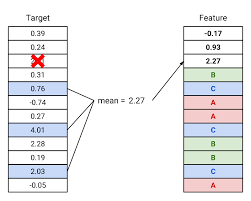

In [29]:
X_target=df_train.copy()
X_target['day']=X_target['day'].astype('object')
X_target['month']=X_target['month'].astype('object')
for col in X_target.columns:
    if (X_target[col].dtype=='object'):
        target= dict ( X_target.groupby(col)['target'].agg('sum')/X_target.groupby(col)['target'].agg('count'))
        X_target[col]=X_target[col].replace(target).values
        
    
    

X_target.head(4)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,0.302537,0.290107,0.327145,0.360978,0.307162,0.242813,...,0.368421,2,0.403885,0.257877,0.306993,0.208354,0.401186,0.322048,0.244432,0
1,1,0,1,0,0.302537,0.290107,0.327145,0.290054,0.359209,0.289954,...,0.076923,1,0.403885,0.326315,0.206599,0.186877,0.303880,0.340292,0.327496,0
2,2,0,0,0,0.309384,0.290107,0.241790,0.290054,0.293085,0.289954,...,0.172414,1,0.317175,0.403126,0.306993,0.351864,0.206843,0.340292,0.244432,0
3,3,0,1,0,0.309384,0.290107,0.351052,0.290054,0.307162,0.339793,...,0.227273,1,0.403885,0.360961,0.330148,0.208354,0.355985,0.322048,0.255729,1


##  2.4.7 K-Fold target encoding <a id='k'> </a>

k-fold target encoding can be applied to reduce the overfitting. In this method, we divide the dataset into the k-folds, here we consider 5 folds. Fig.3 shows the first round of the 5 fold cross-validation. We calculate mean-target for fold 2, 3, 4 and 5 and we use the calculated values, mean_A = 0.556 and mean_B = 0.285 to estimate mean encoding for the fold-1.

![](https://miro.medium.com/max/1955/1*ZKD4eZXzd_FdN0SQDszFVQ.png)


In [30]:
X['target']=y
cols=X.drop(['target','id'],axis=1).columns

In [31]:
from sklearn.model_selection import KFold
X_fold=X.copy()
X_fold[['ord_0','day','month']]=X_fold[['ord_0','day','month']].astype('object')
X_fold[['bin_3','bin_4']]=X_fold[['bin_3','bin_4']].replace({'Y':1,'N':0,'T':1,"F":0})
kf = KFold(n_splits = 5, shuffle = False, random_state=2019)
for train_ind,val_ind in kf.split(X):
    for col in cols:
        if(X_fold[col].dtype=='object'):
            replaced=dict(X.iloc[train_ind][[col,'target']].groupby(col)['target'].mean())
            X_fold.loc[val_ind,col]=X_fold.iloc[val_ind][col].replace(replaced).values


In [32]:
X_fold.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0,0,0,1,1,0.327356,0.360281,0.305929,0.24171,...,0.5,0.334926,0.403542,0.259103,0.307031,0.211418,0.412888,0.323473,0.244538,0
1,1,0,1,0,1,1,0.327356,0.290501,0.358107,0.289501,...,0.125,0.278366,0.403542,0.327796,0.208194,0.185704,0.293144,0.341711,0.327219,0
2,2,0,0,0,0,1,0.242135,0.290501,0.293881,0.289501,...,0.166667,0.278366,0.316665,0.402135,0.307031,0.354919,0.208748,0.341711,0.244538,0
3,3,0,1,0,0,1,0.350536,0.290501,0.305929,0.340791,...,0.233333,0.278366,0.403542,0.361036,0.330519,0.211418,0.358066,0.323473,0.255791,1
4,4,0,0,0,0,0,0.350536,0.290501,0.293881,0.340791,...,0.137931,0.278366,0.403542,0.225265,0.208194,0.354919,0.410066,0.341711,0.327219,0


##  <p style="text-align: center;"> 3. Conclusion </p><a id="Conclusion"> </a>

This Notebook Contains UTF-8 to ASCII conversions and various categorical data conversion techniques

##   <p style="text-align: center;"> 4. Contribution </p> <a id='Contribution'> </a>

This was a fun project in which we explore the idea of Data cleaning and Data Preprocessing. We take inspiration from kaggle learning course and create our own notebook enhancing the same idea and supplementing it with our own contributions from our experiences and past projects.
       
- Code by self : 65%
- Code from external Sources : 35%

##   <p style="text-align: center;"> 5. Citations </p> <a id="Citation"> </a>

- https://methods.sagepub.com/base/download/DatasetStudentGuide/encodings-in-isis-twitter-2016-python
- https://www.kaggle.com/rtatman/data-cleaning-challenge-character-encodings/
- https://www.kaggle.com/shahules/an-overview-of-encoding-techniques
- https://www.kaggle.com/shivan118/end-to-end-regular-expressions-tutorial
- https://medium.com/jbennetcodes/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f

##    <p style="text-align: center;"> 6. License </p> <a id="License"> </a>
Copyright (c) 2020 Manali Sharma, Rushabh Nisher

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software. THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.